# Decision Trees

## Step 1: Problem Statement

The goal is to __predict survival__ of passengers travelling in RMS __Titanic__ using __Logistic regression__.


## Step 2: Importing Necessary Packages

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline

## Step 3: Importing Data

In [2]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")     # Importing training dataset using pd.read_csv

## Step 4: Data Preprocessing

In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


+ The Cabin Column is to be dropped as there are too many missing data.
+ Enbarked Column has missing data which can be filled by using mode
+ Age Column has missing values. It can be filled by median

In [4]:
titanic_data.drop('Cabin', inplace=True,axis=1)
median_age = titanic_data.Age.median()
titanic_data['Age'].fillna(median_age, inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


+ A new Feature FamilySize can be made combining Sibsp and parch

In [5]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] +1

+ Segmenting the gender class if age < 15 then child else on basis of their gender male or female

In [6]:
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)

### Getting Dummies for categorical data Gender Class and Embarked

In [7]:
titanic_data = pd.get_dummies(titanic_data, columns=['GenderClass','Embarked'], drop_first=True)

### Drop Columns which do not contribute to the prediction

In [8]:
titanic_data.drop(['Name','PassengerId','Ticket','Sex','SibSp','Parch'],axis=1,inplace=True)

## Step 5: Data Analysis

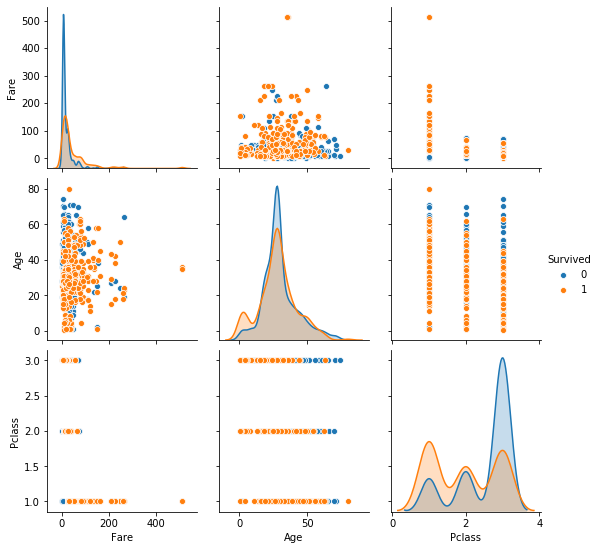

In [9]:
sns.pairplot(titanic_data[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],hue="Survived", dropna=True)

Observing the diagonal elements,
- More people of __Pclass 1__ _survived_ than died (First peak of red is higher than blue)
- More people of __Pclass 3__ _died_ than survived (Third peak of blue is higher than red)
- More people of age group __20-40 died__ than survived.
- Most of the people paying __less fare died__.

Text(0.5, 1, 'Correlation between features')

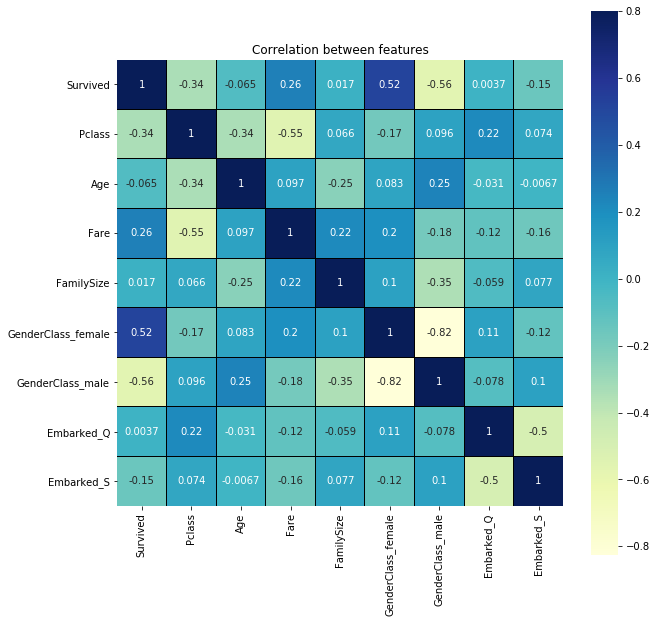

In [10]:
corr = titanic_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

- __Age and Pclass are negatively corelated with Survived.__
- FamilySize is made from Parch and SibSb only therefore high positive corelation among them.
- __Fare and FamilySize__ are __positively coorelated with Survived.__
- With high corelation we face __redundancy__ issues.

In [11]:
titanic_data.drop('GenderClass_female',axis=1,inplace=True)

####  Features and Result analysis
By looking at the data We can tell that The target variable is survived and the rest are features

In [12]:
result = 'Survived'
features = titanic_data.columns.tolist()
features.remove(result)

## Step 6: Splitting data into train and test

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(titanic_data[features], titanic_data[result], test_size=0.20, random_state=1)

## Step 7: Scaling data

In [14]:
from sklearn.preprocessing import StandardScaler
feature_scalers = [];
for feature in features:
    scaler = StandardScaler().fit(np.array(x_train[feature]).reshape(len(x_train.index),1))
    feature_scalers.append(scaler)

In [15]:
x_scaled_train = pd.DataFrame()
x_scaled_test = pd.DataFrame()

for index in np.arange(0,len(features)):
    feature = features[index]
    scaler = feature_scalers[index]
    x_scaled_train[feature] = scaler.transform(np.array(x_train[feature]).reshape(len(x_train.index),1)).flatten()
    x_scaled_test[feature] = scaler.transform(np.array(x_test[feature]).reshape(len(x_test.index),1)).flatten()


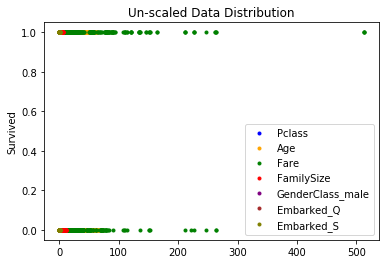

In [16]:
plt.plot( 'Pclass', 'Survived', data=titanic_data, color='blue', label="Pclass",linestyle='None',marker = ".")
plt.plot( 'Age', 'Survived', data=titanic_data, color='orange', label="Age",linestyle='None',marker = ".")
plt.plot( 'Fare', 'Survived', data=titanic_data, color='green', label="Fare",linestyle='None',marker = ".")
plt.plot( 'FamilySize', 'Survived', data=titanic_data, color='red', label="FamilySize",linestyle='None',marker = ".")
plt.plot( 'GenderClass_male', 'Survived', data=titanic_data, color='purple', label="GenderClass_male",linestyle='None',marker = ".")
plt.plot( 'Embarked_Q', 'Survived', data=titanic_data, color='brown', label="Embarked_Q",linestyle='None',marker = ".")
plt.plot( 'Embarked_S', 'Survived', data=titanic_data, color='olive', label="Embarked_S",linestyle='None',marker = ".")
plt.title('Un-scaled Data Distribution')
plt.ylabel('Survived')
plt.legend()

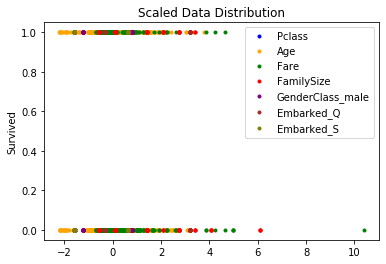

In [17]:
scaled_data = pd.DataFrame()
scaled_data[features] = x_scaled_train[features]
scaled_data[result] = y_train

plt.plot( 'Pclass', 'Survived', data=scaled_data, color='blue', label="Pclass",linestyle='None',marker = ".")
plt.plot( 'Age', 'Survived', data=scaled_data, color='orange', label="Age",linestyle='None',marker = ".")
plt.plot( 'Fare', 'Survived', data=scaled_data, color='green', label="Fare",linestyle='None',marker = ".")
plt.plot( 'FamilySize', 'Survived', data=scaled_data, color='red', label="FamilySize",linestyle='None',marker = ".")
plt.plot( 'GenderClass_male', 'Survived', data=scaled_data, color='purple', label="GenderClass_male",linestyle='None',marker = ".")
plt.plot( 'Embarked_Q', 'Survived', data=scaled_data, color='brown', label="Embarked_Q",linestyle='None',marker = ".")
plt.plot( 'Embarked_S', 'Survived', data=scaled_data, color='olive', label="Embarked_S",linestyle='None',marker = ".")
plt.title('Scaled Data Distribution')
plt.ylabel('Survived')
plt.legend()

## Step 8: Applying Decision Trees Algorithm on train data

In [18]:
from sklearn import tree
decisionTree = tree.DecisionTreeClassifier(criterion='gini')
decisionTree.fit(x_scaled_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
y_train_pred = decisionTree.predict(x_scaled_train)
y_test_pred = decisionTree.predict(x_scaled_test)

In [20]:
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus
#dot_data = StringIO()
#export_graphviz(decisionTree, out_file=dot_data,  
#                filled=True, rounded=True,
#               special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

## Step 9: Model Evaluation

### Accuracy

In [21]:
from sklearn.metrics import accuracy_score
print("{} is the accuracy score from Logistic Regression for train".format(accuracy_score(y_train,y_train_pred)))
print("{} is the accuracy score from Logistic Regression for test".format(accuracy_score(y_test,y_test_pred)))

0.9873595505617978 is the accuracy score from Logistic Regression for train
0.776536312849162 is the accuracy score from Logistic Regression for test


### Confusion Metrics

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test,y_test_pred))
confusion_matrix.index = ["Actual Died","Actual Survived"]
confusion_matrix.columns = ["Predicted Died","Predicted Survived"]
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  90                  16
Actual Survived              24                  49


In [23]:
print("Total no of pridictions: {}".format(confusion_matrix.iloc[0,0] + confusion_matrix.iloc[0,1] + confusion_matrix.iloc[1,0] + confusion_matrix.iloc[1,1]))
print("{} predictions were correct".format(confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,1]))
print("{} predictions were wrong".format(confusion_matrix.iloc[0,1] + confusion_matrix.iloc[1,0]))
print("Accuracy is {}".format((confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,1])/(confusion_matrix.iloc[0,0] + confusion_matrix.iloc[0,1] + confusion_matrix.iloc[1,0] + confusion_matrix.iloc[1,1])))

Total no of pridictions: 179
139 predictions were correct
40 predictions were wrong
Accuracy is 0.776536312849162


### Altering Threshold
Adjusting the threshold to considered as survived to 0.75. It is 0.5 as default

In [24]:
preds1_train = np.where(decisionTree.predict_proba(x_scaled_train)[:,1] > 0.75,1,0)
preds1_test = np.where(decisionTree.predict_proba(x_scaled_test)[:,1] > 0.75,1,0)

In [25]:
print("{} is the accuracy score from Logistic Regression for train with threshold = 0.75".format(accuracy_score(y_train,preds1_train)))
print("{} is the accuracy score from Logistic Regression for test with threshold = 0.75".format(accuracy_score(y_test,preds1_test)))

0.9873595505617978 is the accuracy score from Logistic Regression for train with threshold = 0.75
0.776536312849162 is the accuracy score from Logistic Regression for test with threshold = 0.75


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, preds1_test))
confusion_matrix.columns = ["Actual Died","Actual Survived"]
confusion_matrix.index = ["Predicted Died","Predicted Survived"]
print(confusion_matrix)

                    Actual Died  Actual Survived
Predicted Died               90               16
Predicted Survived           24               49


In [27]:
print("Total no of pridictions: {}".format(confusion_matrix.iloc[0,0] + confusion_matrix.iloc[0,1] + confusion_matrix.iloc[1,0] + confusion_matrix.iloc[1,1]))
print("{} predictions were correct".format(confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,1]))
print("{} predictions were wrong".format(confusion_matrix.iloc[0,1] + confusion_matrix.iloc[1,0]))
print("Accuracy is {}".format((confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,1])/(confusion_matrix.iloc[0,0] + confusion_matrix.iloc[0,1] + confusion_matrix.iloc[1,0] + confusion_matrix.iloc[1,1])))

Total no of pridictions: 179
139 predictions were correct
40 predictions were wrong
Accuracy is 0.776536312849162
